In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Script for Harris feature detector
import harris

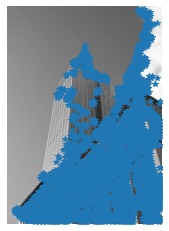

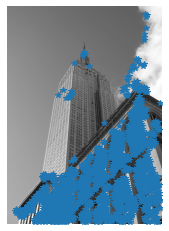

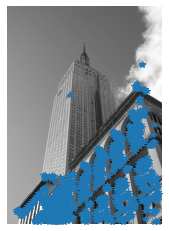

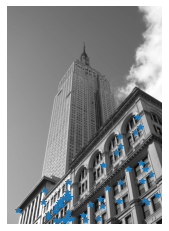

In [3]:
im = np.array(Image.open('../../images/empire.jpg').convert('L'))
harrisim = harris.compute_harris_response(im)

for i in [0.01,0.05,0.1,0.5]:
    filtered_coord = harris.get_harris_points(harrisim,6,i)
    harris.plot_harris_points(im,filtered_coord)

In [34]:
loc

array([[ 34.18722153, 752.39447021,   2.15142345, 216.67141724],
       [ 49.30842209, 747.17651367,  16.54858589, 214.35910034],
       [ 51.21343231, 759.76550293,   2.04597545, 122.39196777],
       ...,
       [561.86846924, 493.91381836,   2.02477837, 356.25808716],
       [564.09759521, 586.3916626 ,   1.79633582, 164.54017639],
       [564.3137207 , 736.42895508,   2.57551837, 349.5932312 ]])

Start matching


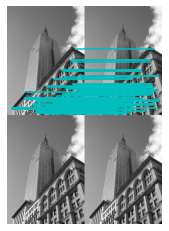

In [4]:
# Matching by normalized cross correlation (NCC) on the same image
im1 = im
im2 = im

wid = 5
harrisim = harris.compute_harris_response(im1,5)
filtered_coord1 = harris.get_harris_points(harrisim,wid+1,0.5)
d1 = harris.get_descriptors(im1,filtered_coord1,wid)

harrisim = harris.compute_harris_response(im2,5)
filtered_coord2 = harris.get_harris_points(harrisim,wid+1,0.5)
d2 = harris.get_descriptors(im2,filtered_coord2,wid)

print('Start matching')
matches = harris.match_twosided(d1,d2)

plt.figure()
plt.gray()
harris.plot_matches(im1,im2,filtered_coord1,filtered_coord2,matches)
plt.show()

In the book, the next section concerns about SIFT descriptor using VLFeat, 
but some error occurs and I don't know how to fix it, so I skip that

Error:

sift(77395,0x10bcf0e00) malloc: can't allocate region

:*** mach_vm_map(size=3480250175416827904, flags: 40000100) failed (error code=3)

sift(77395,0x10bcf0e00) malloc: *** set a breakpoint in malloc_error_break to debug

sift(77395,0x10bcf0e00) malloc: can't allocate region

:*** mach_vm_map(size=13921000701667307520, flags: 40000100) failed (error code=3)

sift(77395,0x10bcf0e00) malloc: *** set a breakpoint in malloc_error_break to debug

sift: err: Could not allocate enough memory. (2)

In [2]:
# Implementation by opencv instead
import sift

In [3]:
# Process image to write features to txt
sift.process_image('empire.jpg','empire.sift')

Finding ../../images/empire.jpg... Done
Detecting features... Done
Writing to ../../images/empire.sift... Done


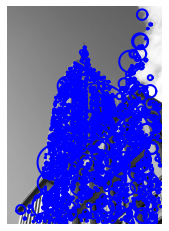

In [4]:
# Plot images with circles around features
im = np.array(Image.open('../../images/empire.jpg').convert('L'))

loc, des = sift.read_features_from_file('empire.sift')

plt.figure()
plt.gray()
sift.plot_features(im,loc,circle=True)
plt.show()

Start matching


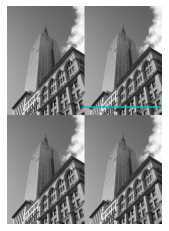

In [5]:
# Matching by ratio test on the same image
print('Start matching')
matches = sift.match_twosided(des,des)

plt.figure()
plt.gray()
sift.plot_matches(im,im,loc,loc,matches)
plt.show()

Geotagged image: Outdated API